In [35]:
import os,sys
sys.path.insert(0, os.path.abspath('.').split('/dnn')[0])

from dnn.model.yolov3_tiny import YoloV3Tiny, YoloLoss
from dnn.utils.dataLoader import dataLoader
from dnn.utils.yolo_encoder import yoloEncoder
from dnn.parameters import PARAM
from dnn.utils.mem import tf_set_memory_growth
from dnn.data.converters.utils import CLASS_NAMES


import numpy as np 
%matplotlib notebook
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

import tensorflow as tf
display(CLASS_NAMES)

['car', 'watcher', 'base', 'armor_red', 'armor_blue']

In [2]:
# Load data & model
loader_test = dataLoader(train = False)
val_data = loader_test(PARAM['val'])
encoder = yoloEncoder(PARAM['size'], PARAM['yolo_tiny_anchors'], PARAM['yolo_tiny_anchor_masks'])
val = encoder(val_data)
val = val.batch(1)
val = val.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

model = tf.keras.models.load_model('../checkpoint', compile=False)
'done'

'done'

In [3]:
# Confirm model can run on empty image
out = model(tf.zeros([1,416,416,3]))
label_shape = lambda out: list(map(lambda x:x.shape,out))
label_shape(out)

[TensorShape([1, 13, 13, 3, 10]), TensorShape([1, 26, 26, 3, 10])]

(1, 416, 416, 3)
[TensorShape([1, 13, 13, 3, 6]), TensorShape([1, 26, 26, 3, 6])]


<IPython.core.display.Javascript object>


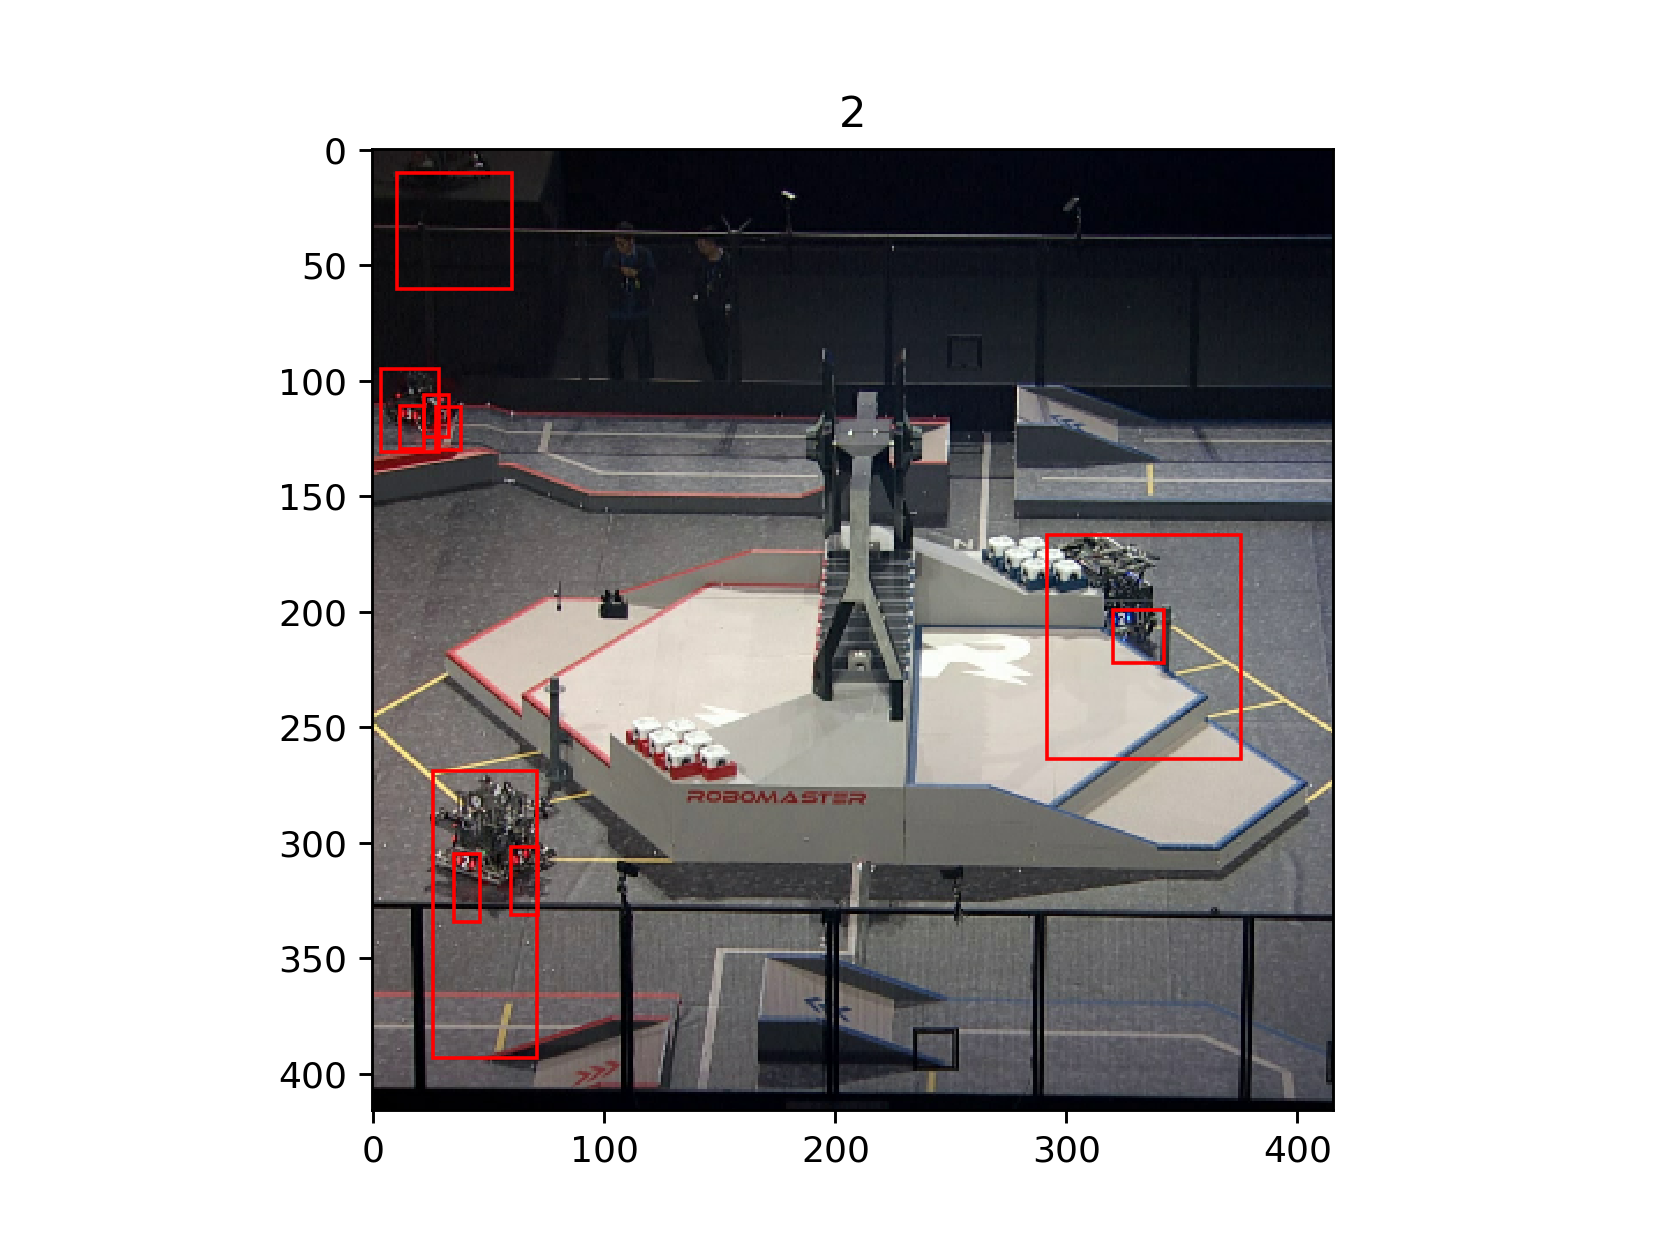

Grain 1:
Grain 2:
0th box have armor_red at [6,1]: [0.05239164 0.25473607 0.07703517 0.26999167 1.         3.        ]
[[10. 14.]
 [23. 27.]
 [37. 58.]]
1th box have car at [6,1]: [0.00779812 0.22774535 0.09346386 0.293462   1.         0.        ]
[[10. 14.]
 [23. 27.]
 [37. 58.]]
0th box have armor_red at [7,0]: [0.02774723 0.26647127 0.04769721 0.28290087 1.         3.        ]
[[10. 14.]
 [23. 27.]
 [37. 58.]]
0th box have armor_red at [7,1]: [0.06529995 0.26764536 0.08407589 0.28290087 1.         3.        ]
[[10. 14.]
 [23. 27.]
 [37. 58.]]
2th box have car at [11,19]: [0.70134246 0.40025184 0.81987023 0.5152555  1.         0.        ]
[[10. 14.]
 [23. 27.]
 [37. 58.]]
0th box have armor_blue at [12,20]: [0.7694073  0.4788768  0.78935176 0.49765274 1.         4.        ]
[[10. 14.]
 [23. 27.]
 [37. 58.]]
2th box have car at [18,3]: [0.06177961 0.6466888  0.19321291 0.75934535 1.         0.        ]
[[10. 14.]
 [23. 27.]
 [37. 58.]]
0th box have armor_red at [19,2]: [0.08407589 0.7

In [67]:
def rect(x,y,w,h,linewidth=1,edgecolor='r', **kwargs):
    rect = patches.Rectangle((x,y),w,h,facecolor='none',linewidth=linewidth,edgecolor=edgecolor,**kwargs)
    plt.gca().add_patch(rect)

def graph_objs(labels, anchors):
    for i in range(labels.shape[1]):
        for j in range(labels.shape[2]):
            for n in range(labels.shape[3]):
                obj = labels[0,i,j,n,:]
                if obj[4]!=0:
                    print(f'{n}th box have {CLASS_NAMES[int(obj[5])]} at [{i},{j}]: {obj}')
                    anchor = anchors[n]
                    print(anchors)
                    centx,centy = obj[0]*416,obj[1]*416
                    w,h = np.e**obj[2]*anchor[0], np.e**obj[3]*anchor[1]
                    #w,h = obj[2]*416,obj[3]*416
                    #centx+=w/2
                    #centy+=h/2
                    rect(centx,centy,w,h)
    
num=1
for batch, (images, labels) in enumerate(val):
    if (num:=num-1)<0: break
    
    print(images.shape)
    print(label_shape(labels))
    
    plt.figure()
    plt.title(f'{n}')
    plt.imshow(tf.squeeze(images))
    rect(10,10,50,50)
    
    print("Grain 1:")
    graph_objs(labels[0], anchors = PARAM['yolo_tiny_anchors'][PARAM['yolo_tiny_anchor_masks'][1].astype(int)])
    
    print("Grain 2:")
    graph_objs(labels[1], anchors = PARAM['yolo_tiny_anchors'][PARAM['yolo_tiny_anchor_masks'][1].astype(int)])

In [51]:
PARAM['yolo_tiny_anchors'][PARAM['yolo_tiny_anchor_masks'][0].astype(int)]

array([[ 81.,  82.],
       [135., 169.],
       [344., 319.]], dtype=float32)

In [50]:
PARAM['yolo_tiny_anchor_masks'][0]

array([3., 4., 5.], dtype=float32)